# Part I - (Ford GoBike System Data)
## by (Ibe Nchedochukwu)

## Introduction
> This dataset includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay Area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Here I load in my dataset and assess the data to help me understand the dataset better and also to perform some data cleaning if there is need for it


In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183,412 data entries in the dataset with 16 columns(duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, and bike share for all trip. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in analyzing the features that that would help me predict the age group with the highest number that made use of the bikeshare scheme.
> I am also interested in looking at how Subscribers and Customers affect or shape that dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Member gender, user type, member birth year(age), bike share for all trips and duration in minutes would help support my investigation of the dataset.



> Since I would be making use of these features, I would need to perform some data cleaning on them to ensure that I get the right result.
 - First I would start by creating a copy of my dataset.
 - I would be making changes to my member birth year, first by filling the null values with the mean and then creating a new column to get their actual age then converted it to an integar.
 - Then I dropped the null values on my dataset.
 - I also found the Duration in Minutes by dividing the duration_sec by 60 and converted it to an integar.
 - After cleaning, the total number of my dataset went down to 174,952.

In [5]:
df_clean= df.copy()

In [6]:
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
mean= df_clean['member_birth_year'].mean()

In [8]:
df_clean['member_birth_year'].fillna(mean, inplace= True)

In [9]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [10]:
df_clean.dropna(axis= 0, inplace = True)

In [11]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
df_clean['age'] = 2022 - df_clean.member_birth_year

In [13]:
df_clean['duration_min']= df_clean['duration_sec']/60

In [15]:
df_clean['duration_min']= df_clean['duration_min'].astype(int)

In [16]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,37.196865,11.241461
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,27.371269
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,21.000000,1.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,30.000000,5.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,35.000000,8.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,42.000000,13.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,144.000000,1409.000000


## Univariate Exploration
> I will go ahead to look at the univariate distributions of the different variables of interest that would aid my analysis.

#### I will start by looking at the distribution of Variable of interest: User type.

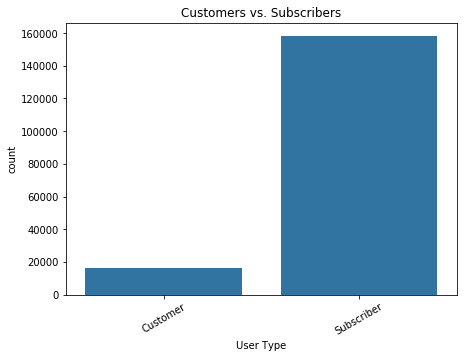

In [17]:
plt.figure(figsize= (7,5))
base_color= sb.color_palette()[0]
sb.countplot(data= df_clean, x= 'user_type', color= base_color).set(title= 'Customers vs. Subscribers')
plt.xticks(rotation= 30)
plt.xlabel('User Type');

We can see from this visulaization that the people that are subscribers on this bike share dataset are higher in number than t

#### Next I look at the second variable: Member gender

In [18]:
df_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

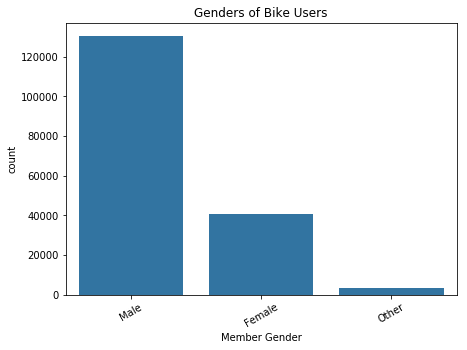

In [19]:
gender= df_clean['member_gender'].value_counts().index
plt.figure(figsize= (7,5))

base_color= sb.color_palette()[0]
sb.countplot(data= df_clean, x= 'member_gender', color= base_color, order= gender).set(title= 'Genders of Bike Users')
plt.xlabel('Member Gender')
plt.xticks(rotation=30)
plt.show()

We can see that the males(130,500) that participated in the bike sharing were higher with the females(40,8050 taking second place and people that identified as other gender types(3,647) coming last place.

#### Next variable of Interest is those who used the bike share for all trips

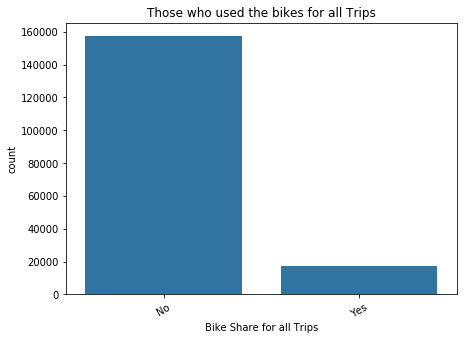

In [20]:
plt.figure(figsize= (7,5))
base_color= sb.color_palette()[0]
sb.countplot(data= df_clean, x= 'bike_share_for_all_trip', color= base_color).set(title= 'Those who used the bikes for all Trips')
plt.xticks(rotation= 30)
plt.xlabel('Bike Share for all Trips');

We can see that majority of the people in the bikeshare scheme did not use the bike for all of their trips leaving the numbers that actually used it for all the trips very low

#### Next, we would be looking at the main variable of interest: Age(member birth year)

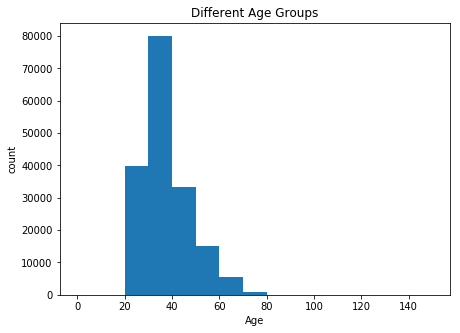

In [21]:
binsize= 10
bins= np.arange(0, df_clean['age'].max()+binsize, binsize)
plt.figure(figsize=[7,5])
plt.hist(data= df_clean, x= 'age', bins= bins)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Different Age Groups')
plt.show();

From this visulaization we can see that the people that participated the most from the bikesharing scheme was around the ages of 30 to 40 years of age.

#### Lastly we would be taking a look at the duration( in Minutes):

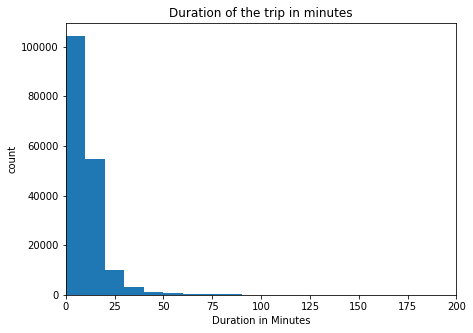

In [22]:
binsize= 10
bins= np.arange(0, df_clean['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[7,5])
plt.hist(data= df_clean, x= 'duration_min', bins= bins)
plt.xlabel('Duration in Minutes')
plt.ylabel('count')
plt.title('Duration of the trip in minutes')
plt.xlim((0,200))
plt.show();

From this visualization we can see that the highest duration in minutes was around 0-24 which shows that majority of the people that participated didnt last very long, only a few people made it

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I noticed that my Age variable is postively skewed to the right, I did not encounter any unsual points or perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  Since I fixed most of the issues during my data cleaning, since they were null values I droped some rows in the dataset bringing the total number of the entries to 174,952. I also had to create a new column to get the actual age of the participants and also create another column for the duration_min so it could be converted to an integer.

## Bivariate Exploration

 #### Is there any relationship between the User type and the ages in the dataset?

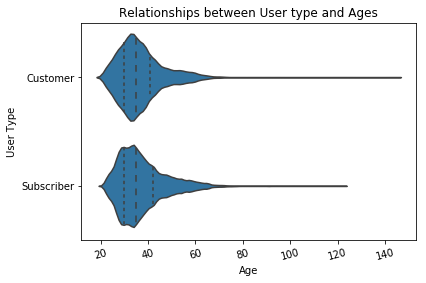

In [23]:
base_color= sb.color_palette()[0]
sb.violinplot(data= df_clean, x= 'age', y= 'user_type', color= base_color, inner= 'quartile');
plt.xticks(rotation= 15);
plt.xlabel('Age')
plt.ylabel('User Type')
plt.title('Relationships between User type and Ages');

We can see from the plot above that both Subscribers and Customers are around the same age group of 20 to 45 although the outlier on the customer side is higher

#### What is the relationship between the Age and Bike share for all Trips? 

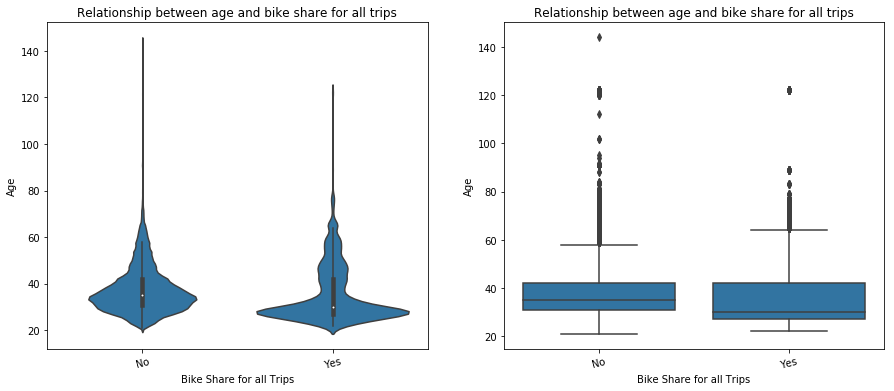

In [24]:
base_color= sb.color_palette()[0]
plt.figure(figsize= [15, 6])

plt.subplot(1,2,1)
sb.violinplot(data= df_clean, x= 'bike_share_for_all_trip', y= 'age',
           color= base_color);
plt.xticks(rotation= 15)
plt.xlabel('Bike Share for all Trips')
plt.ylabel('Age')
plt.title('Relationship between age and bike share for all trips');

plt.subplot(1,2,2)
sb.boxplot(data= df_clean, x= 'bike_share_for_all_trip', y= 'age',
           color= base_color);
plt.xticks(rotation= 15)
plt.xlabel('Bike share for all Trips')
plt.ylabel('Age')
plt.title('Relationship between age and bike share for all trips');

From the Visualization, we can see that people from ages 20 to 40 used the bike for all trips

#### Is there an relationship between Age and Duration In Minutes?

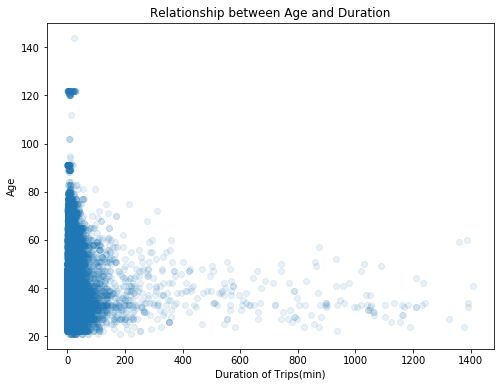

In [25]:
plt.figure(figsize= (8,6))
sb.regplot(data = df_clean, x = 'duration_min', y = 'age', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg= False)
plt.xlabel('Duration of Trips(min)')
plt.ylabel('Age')
plt.title('Relationship between Age and Duration');

We can see from the distribution below that there is no correlation between the age and the duration in minutes however we can see that majority of the younger age groups didnt make it to 200minutes and only a few of them got to 1,400minutes

#### Is there a Relationship between Genders and Usertype?

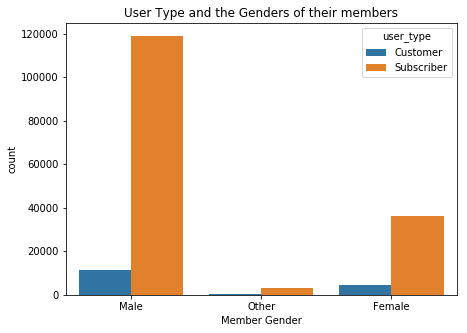

In [26]:
plt.figure(figsize= [7,5])
sb.countplot(data= df_clean, x= 'member_gender', hue= 'user_type')
plt.xlabel('Member Gender')
plt.title('User Type and the Genders of their members');

We see that people that most males were subscribers of the bike sharing scheme

#### Is there a realtionship between Gender and Duration of Trip in Minutes?

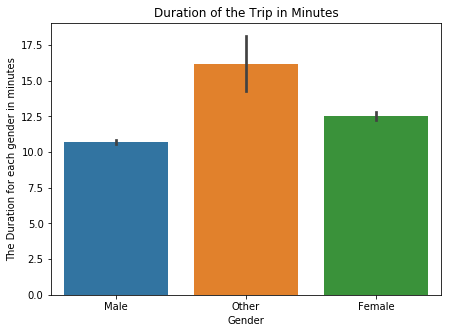

In [27]:
plt.figure(figsize = (7,5))
sb.barplot(data = df_clean, x = 'member_gender', y = 'duration_min')
plt.xlabel('Gender')
plt.ylabel('The Duration for each gender in minutes')
plt.title('Duration of the Trip in Minutes')
plt.show();

Most people that identified their gender as 'Other' took more trips that the females and males in the dataset

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - Subscribers and Customers are around the age group pg 20 to 45
 - People aged 20 to 40 years used the bikes for all trips
 - Majority of the younger age groups did not make it to 200minutes and a few of them got to 1,400
 - Most males were subscribers of the bike sharing scheme
 - Other genders took more trips than females and males


## Multivariate Exploration

#### Comapring Age, Gender and Duration(min)

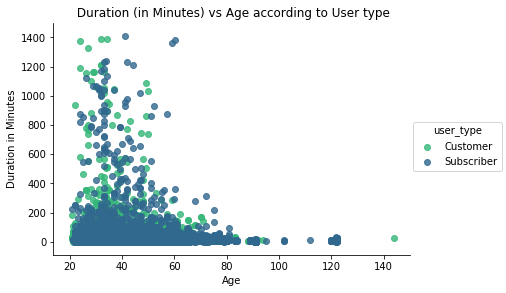

In [28]:
g= sb.FacetGrid(data= df_clean, hue= 'user_type',
               size= 4, aspect= 1.5, palette= 'viridis_r')
g= g.map(sb.regplot, 'age', 'duration_min', x_jitter= 0.04, fit_reg= False);
g.add_legend();
plt.xlabel('Age')
plt.ylabel('Duration in Minutes')
plt.title(' Duration (in Minutes) vs Age according to User type');

Majority of the people aged 20 to 50 were subscribers and customers, they also used the bike for longer duration in minutes than people of older ages 

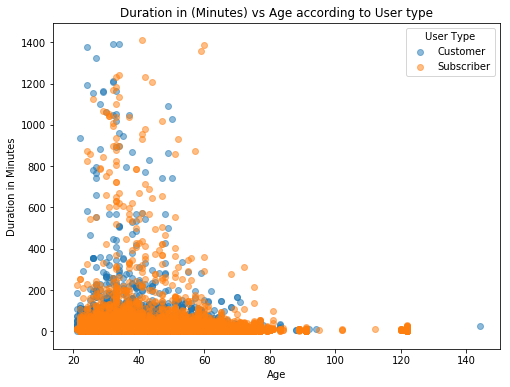

In [29]:
plt.figure(figsize = [8,6]);
user_type_markers = [['Customer', '^'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df_clean[df_clean['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_min', alpha=10/20);
plt.legend(['Customer','Subscriber'], title='User Type');
plt.xlabel('Age');
plt.ylabel('Duration in Minutes');
plt.title('Duration in (Minutes) vs Age according to User type');

I had to plot this differently to see the distributions more clearly

#### Comparison of Gender, Duration(min) and User type

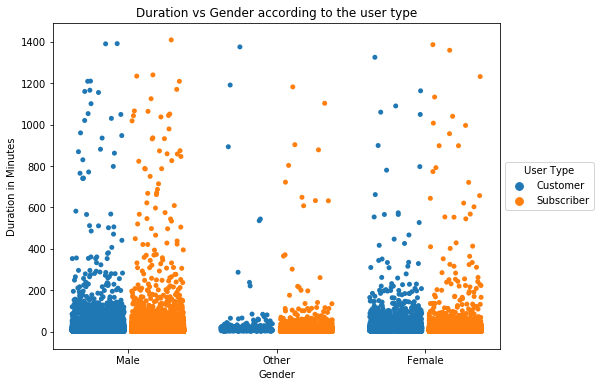

In [30]:
plt.figure(figsize=[8,6]);
sb.stripplot(data=df_clean, y='duration_min', x='member_gender',hue='user_type',
            jitter= 0.35, dodge= True);
plt.legend(loc= 'center left', bbox_to_anchor= (1,0.5), title= 'User Type')
plt.xlabel('Gender')
plt.ylabel('Duration in Minutes');
plt.title('Duration vs Gender according to the user type');

The majority of the people that rode the bike for long distances were males and they had the most suscribers and customers

#### Comparison of Bike share for all Trip, Age and User type

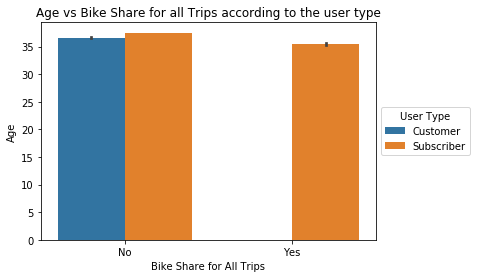

In [31]:
ax = sb.barplot(data = df_clean, x = 'bike_share_for_all_trip', y = 'age', hue = 'user_type')
ax.legend(loc = 'center left', bbox_to_anchor= (1,0.5), title = 'User Type')
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Age');
plt.title('Age vs Bike Share for all Trips according to the user type');

We can see here that most people who were aged 0-35 that were subscribers used their bikes for all trips, also people that did not use their bikes for all trips were both cutomers and subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 - Majority of the people aged 20-50 years were subscribers and customers, they also used their bikes for a long period of time.
 - People aged 0-35 that were subscribers used their bikes for all trips, people that did not use thier bikes for all trips consisted of both customers and subscribers.


## Conclusions
>I found out that most young people are interested in the bike sharing scheme given the number of young people in the dataset.
> I also found out that majority of those that were subscribers used the bike share for all trips so it needs to be put into consideration for the next bike scheme that might happen in future.
